In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("XLMRoBERTLargeRuSentimentResults.xlsx")

In [ ]:
df

,title,author,act,scene,speaker,text,yearNormalized,normalizedGenre,numOfActs,numOfSpeakersMale,numOfSpeakersFemale,XLMSentiment,scoreXLMRuSentiment,expertSentiment
0,Лукавин,Писарев,-7,NaN,Ветрон,"Эй, братцы, выпьем здоровье наших милых, Солид...",1823,Comedy,5,10,2,SKIP,0.707513,NaN
1,Лукавин,Писарев,-7,NaN,Гости,Конечно.,1823,Comedy,5,10,2,NEUTRAL,0.971675,NaN
2,Лукавин,Писарев,-7,NaN,Ветрон,Подавай.,1823,Comedy,5,10,2,NEUTRAL,0.965023,NaN
3,Лукавин,Писарев,-7,NaN,Змейкин,Прекрасное вино!,1823,Comedy,5,10,2,POSITIVE,0.997097,NaN
4,Лукавин,Писарев,-7,NaN,Усладов,Мечи: в другой уж раз напьешься.,1823,Comedy,5,10,2,NEUTRAL,0.909799,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117037,Фемист и Иеронима,Майков,3,ЯВЛЕНИЕ 7,Фемист,Сокрыл ли славную ты кровь Палеологов?,1775,Tragedy,5,5,1,NEUTRAL,0.781606,NaN
117038,Фемист и Иеронима,Майков,3,ЯВЛЕНИЕ 7,Клит,"Едва я, государь, исшел из сих чертогов. Внемл...",1775,Tragedy,5,5,1,SKIP,0.630807,NaN
117039,Фемист и Иеронима,Майков,3,ЯВЛЕНИЕ 7,Фемист,О боже!,1775,Tragedy,5,5,1,SKIP,0.597723,NaN
117040,Фемист и Иеронима,Майков,3,ЯВЛЕНИЕ 7,Клит,Государь!..,1775,Tragedy,5,5,1,NEUTRAL,0.942564,NaN


In [ ]:
import pandas as pd

comedy_lengths = []
ns_lengths = []
tragedy_lengths = []
for index, row in df.iterrows():
    genre = row['normalizedGenre']
    if genre == 'Comedy':
        comedy_lengths.append(len(row['text']))
    elif genre == 'Tragedy':
        tragedy_lengths.append(len(row['text']))
    else:
        ns_lengths.append(len(row['text']))

In [ ]:
from statistics import mean
mean(comedy_lengths)

87.69383110678734

In [ ]:
mean(ns_lengths)

88.3846834245279

In [ ]:
from statistics import median
median(comedy_lengths)

48

In [ ]:
median(tragedy_lengths)

77

In [ ]:
median(ns_lengths)

46.0

In [ ]:
mean(tragedy_lengths)

165.6441785549931

In [ ]:
from scipy.stats import kruskal, mannwhitneyu
H_stat, p_value_kw = kruskal(sorted(comedy_lengths), sorted(ns_lengths), sorted(tragedy_lengths))
print("Тест Краскела-Уоллиса:")
print(f"H-statistic: {H_stat}, p-value: {p_value_kw}")

Тест Краскела-Уоллиса:
H-statistic: 1606.6055071811093, p-value: 0.0


In [ ]:
def mw_test(group1, group2, name1, name2):
    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
    print(f"\nМанн-Уитни {name1} vs {name2}:")
    print(f"U-statistic: {stat}, p-value: {p}")

mw_test(comedy_lengths, ns_lengths, "comedy", "ns")
mw_test(comedy_lengths, tragedy_lengths, "comedy", "tragedy")
mw_test(ns_lengths, tragedy_lengths, "ns", "tragedy")


Манн-Уитни comedy vs ns:
U-statistic: 1424349172.0, p-value: 4.246450634836082e-07

Манн-Уитни comedy vs tragedy:
U-statistic: 242169545.0, p-value: 2.1368715469468036e-305

Манн-Уитни ns vs tragedy:
U-statistic: 201205184.5, p-value: 0.0


In [ ]:
df['decade'] = (df['yearNormalized'] // 10) * 10
grouped = df.groupby(['decade', 'XLMSentiment']).size().unstack(fill_value=0)
total_per_decade = grouped.sum(axis=1)
df_decade = grouped.div(total_per_decade, axis=0) * 100
df_decade = df_decade.round(2)
#df_decade.to_excel('sentiment_by_decade_percent.xlsx')
#df_decade = df_decade.drop(columns=['XLMSentiment'])
df_decade = df_decade.reset_index()


In [ ]:
df_decade

XLMSentiment,decade,NEGATIVE,NEUTRAL,POSITIVE,SKIP,SPEECH
0,1740,26.84,30.13,1.52,41.52,0.00
1,1750,21.37,46.76,3.32,28.16,0.39
2,1760,23.46,43.81,3.87,28.63,0.23
3,1770,19.72,49.63,4.44,25.71,0.50
4,1780,17.50,58.69,5.41,17.60,0.80
5,1790,19.05,53.88,4.87,21.20,1.00
6,1800,17.81,47.08,7.27,26.86,0.98
7,1810,16.17,59.37,7.22,16.40,0.84
8,1820,15.01,57.83,7.30,19.10,0.76
9,1830,18.06,54.53,7.20,18.08,2.13


In [ ]:
df_decade.describe().to_excel("decade_desc.xlsx")

In [ ]:
import plotly.express as px

decade_fig = px.line(
    df_decade,
    x="decade",
    y=["POSITIVE", "NEGATIVE", "NEUTRAL", "SKIP", "SPEECH"],
    labels={
        "decade": "Десятилетие",
        "value": "Тональность (%)"
    },
    color_discrete_map={
        "POSITIVE": "limegreen",
        "NEGATIVE": "crimson",
        "NEUTRAL": "royalblue",
        "SKIP": "plum",
        "SPEECH": "grey"
    },
)

decade_fig.update_layout(
    title_x=0.5,
    font_family="Bahnschrift",
    legend_title_text='Тональность',
    template="simple_white",
    hovermode='x unified'
)

decade_fig.update_traces(
    line={'width': 5},
    hovertemplate="%{y:.2f}%<extra></extra>"
)

decade_fig.update_xaxes(
    dtick=10,
    showgrid=True,
    gridwidth=1,
    gridcolor='LightGray'

decade_fig.update_yaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='LightGray'
)

decade_fig.show()

In [ ]:
decade_fig.write_html("decade.html")


In [ ]:
df['decade'] = (df['yearNormalized'] // 10) * 10
grouped_df = df.groupby('decade')['scoreXLMRuSentiment'].mean().reset_index()
grouped_df.rename(columns={'scoreXLMRuSentiment': 'score'}, inplace=True)
grouped_df

,decade,score
0,1740,0.684054
1,1750,0.741979
2,1760,0.732038
3,1770,0.757591
4,1780,0.798707
5,1790,0.771185
6,1800,0.766191
7,1810,0.808184
8,1820,0.807024
9,1830,0.800478


In [ ]:
import plotly.express as px


fig = px.line(
    grouped_df,
    x='decade',
    y='score',
    markers=True,
    title='Средняя степень уверенности (score) модели при выборе тональности реплики по десятилетиям',
    labels={'decade': 'Декада', 'score': 'score'},
    template='simple_white'
)

fig.update_traces(line=dict(width=3), marker=dict(size=8))

fig.update_xaxes(tickmode='array', tickvals=grouped_df['decade'])


fig.update_layout(
    font=dict(family="bahnschrift", size=12),
    title_font=dict(family="bahnschrift", size=14),
    xaxis_title_font=dict(family="bahnschrift"),
    yaxis_title_font=dict(family="bahnschrift"),


    title={
        'x': 0.5,
        'xanchor': 'center'
    }
)

fig.write_html("score_by_decade.html", include_plotlyjs='cdn')

print("График успешно сохранён как 'score_by_decade.html'")

График успешно сохранён как 'score_by_decade.html'


In [ ]:
df['decade'] = (df['yearNormalized'] // 10) * 10
count_decade = df.groupby(['decade', 'XLMSentiment']).size().unstack(fill_value=0)

In [ ]:
df['century'] = ((df['yearNormalized'] - 1) // 100) + 1
grouped_df = df.groupby('century')['scoreXLMRuSentiment'].mean().reset_index()
grouped_df.rename(columns={'scoreXLMRuSentiment': 'score'}, inplace=True)

In [ ]:
grouped_df

,century,score
0,18,0.770771
1,19,0.810026
2,20,0.826343


In [ ]:
count_decade

XLMSentiment,NEGATIVE,NEUTRAL,POSITIVE,SKIP,SPEECH
decade,,,,,
1740,106,119,6,164,0
1750,554,1212,86,730,10
1760,309,577,51,377,3
1770,431,1085,97,562,11
1780,1158,3884,358,1165,53
1790,860,2432,220,957,45
1800,583,1541,238,879,32
1810,786,2886,351,797,41
1820,815,3139,396,1037,41


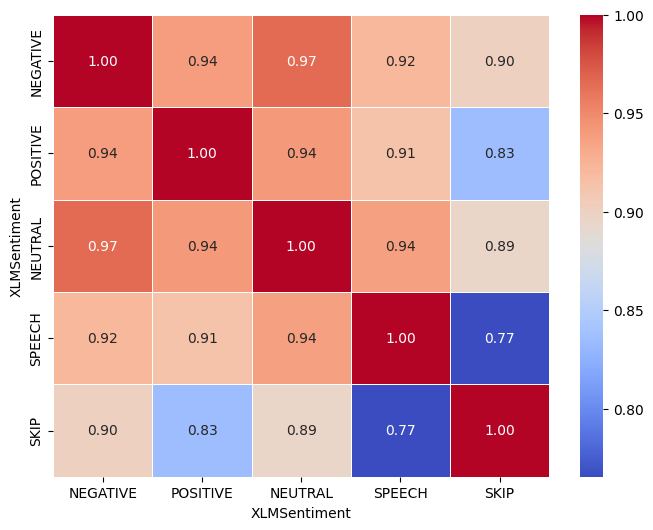

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['NEGATIVE', 'POSITIVE', 'NEUTRAL', 'SPEECH', 'SKIP']
df_filtered = count_decade[columns]

correlation_matrix = df_filtered.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

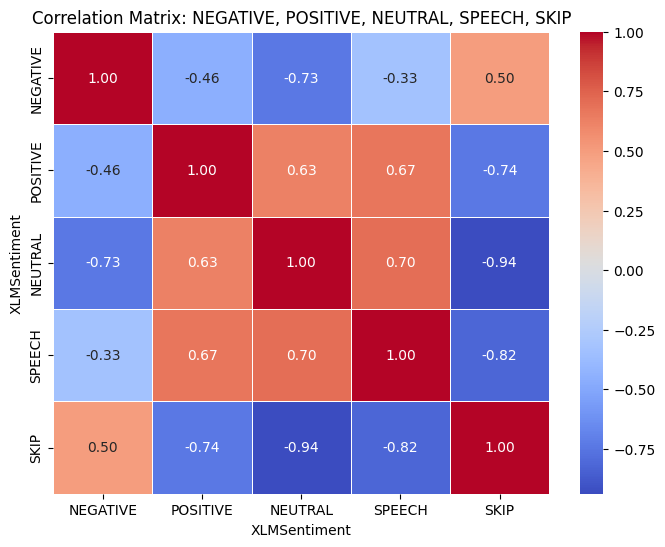

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['NEGATIVE', 'POSITIVE', 'NEUTRAL', 'SPEECH', 'SKIP']
df_filtered = df_decade[columns]

correlation_matrix = df_filtered.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [ ]:
df = pd.read_excel("SentimentByPlay.xlsx")

genre_decade_count = df.groupby(['decade', 'normalizedGenre']).size().reset_index(name='count')
genre_mapping = {
    'Comedy': 'Комедия',
    'Tragedy': 'Трагедия',
    'NotStated': 'Не указан'
}
df['normalizedGenre'] = df['normalizedGenre'].map(genre_mapping)
genre_decade_count = df.groupby(['decade', 'normalizedGenre']).size().reset_index(name='count')

fig = px.bar(
    genre_decade_count,
    x='decade',
    y='count',
    color='normalizedGenre',
    barmode='stack',
    title='Жанровый состав корпуса RusDraCor по десятилетиям',
    labels={'decade': 'Десятилетие', 'count': 'Количество произведений', 'normalizedGenre': 'Жанр'},
    template='simple_white',
    category_orders={'decade': sorted(genre_decade_count['decade'].unique())}
)

fig.update_layout(
    title_x=0.5,
    font=dict(family="Bahnschrift"),
    xaxis_title='Десятилетие',
    yaxis_title='Количество пьес',
    legend_title='Жанр',
    legend=dict(x=0, y=1),
    xaxis=dict(tickmode='array', tickvals=genre_decade_count['decade'].unique())
)

fig.show()

In [ ]:
fig.write_html("count_genre_dist.html")